In [ ]:
pip install backtrader

     |████████████████████████████████| 410 kB 4.3 MB/s 


In [ ]:
pip install strategies

  Created wheel for strategies: filename=strategies-0.2.3-py3-none-any.whl size=8534 sha256=34d777421c940197b4c791206bfd182382ea2dc5176bd42e3c12008f21f5a77b
  Stored in directory: /root/.cache/pip/wheels/98/d1/54/45b254253d5c8866e05f862feec0ff9e32ea6eb66a5d747309
Successfully built strategies


In [ ]:
pip install git+https://github.com/backtrader2/backtrader.git#egg=backtrader

  Cloning https://github.com/backtrader2/backtrader.git to /tmp/pip-install-zhkz7dmh/backtrader_81365fcb84d6474db0e437d0e9839937
  Running command git clone -q https://github.com/backtrader2/backtrader.git /tmp/pip-install-zhkz7dmh/backtrader_81365fcb84d6474db0e437d0e9839937


In [ ]:
import backtrader as bt
import backtrader.analyzers as btanalyzers
import matplotlib
from datetime import datetime
import os
import sys

In [ ]:
class MaCrossStratergy(bt.Strategy):
  '''
  Strategy is to apply two moving averages to a chart: one longer and one shorter. 

  When the shorter-term MA crosses above the longer-term MA, 
  it's a buy signal, as it indicates that the trend is shifting up.

  When the shorter-term MA crosses below the longer-term MA, 
  it's a sell signal, as it indicates that the trend is shifting down. 
  '''

  params = (
        ("period", 20),
        ("devfactor", 2),
        ("size", 20),
        ("debug", False)
        )

  def __init__(self):
    ma_fast = bt.ind.SMA(period = 13)
    ma_slow = bt.ind.SMA(period = 48)

    self.crossover = bt.ind.CrossOver(ma_fast,ma_slow)
  
  def next(self):
    if not self.position:
      if self.crossover > 0:
        self.buy()
    elif self.crossover < 0:
      self.close()

In [ ]:
#Initialize

cerebro = bt.Cerebro()

In [ ]:
#Provide data

modpath = os.path.dirname(os.path.abspath(sys.argv[0]))
datapath = os.path.join(os.getcwd(), '/content/drive/MyDrive/Backtesting/TSLA1.csv')

data = bt.feeds.YahooFinanceData(dataname =datapath, fromdate = datetime(2020,1,1), todate = datetime(2021,4,8))
cerebro.adddata(data)

In [ ]:
#Stratergy

cerebro.addstrategy(MaCrossStratergy)

0

In [ ]:
#Start Amount

cerebro.broker.setcash(100000.0)

In [ ]:
#Sizer

cerebro.addsizer(bt.sizers.PercentSizer, percents=70)

In [ ]:
#Analyzers

cerebro.addanalyzer(btanalyzers.SharpeRatio, _name='sharpe')
#cerebro.addanalyzer(btanalyzers.Transactions, _name='trans')
#cerebro.addanalyzer(btanalyzers.TradeAnalyzer, _name='trades')

In [ ]:
back = cerebro.run()

In [ ]:
cerebro.broker.getvalue()

290410.6344928943

In [ ]:
back[0].analyzers.sharpe.get_analysis()

OrderedDict([('sharperatio', 0.9832419733130339)])

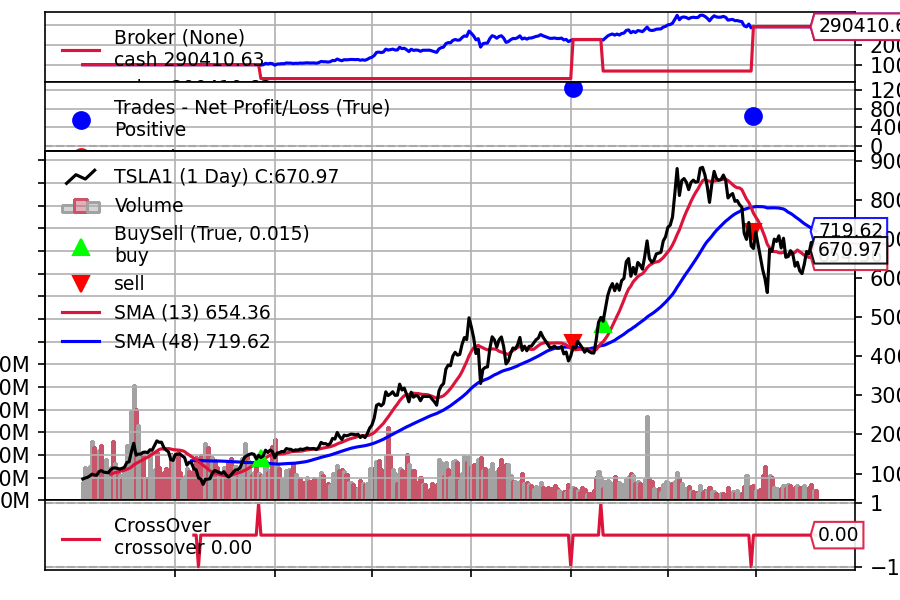

In [ ]:
from google.colab import files
from IPython.display import Image
chart_file = 'result.png'
cerebro.plot()[0][0].savefig(chart_file, dpi=150)
Image(open(chart_file, 'rb').read())